In [1]:
from arcgis.gis import GIS
from arcgis import features
import pandas as pd
from arcgis.features import FeatureLayerCollection
from ARCGIS_PASSWORD import USERNAME, PASSWORD, ARCGIS_URL

gis = GIS(ARCGIS_URL, USERNAME, PASSWORD)
print(gis)



GIS @ https://nuscde.maps.arcgis.com version:10.2


In [13]:
csv_source = 'processed_data/interval_1hour_All.csv'
csv_data = pd.read_csv(csv_source)
csv_data.head()


,Station,Serial number,Latitude,Longitude,Floor,Height,Location description,Building name,Timestamp,Wind Speed,Temperature PT100,Relative Humidity,Solar Radiation,PM1.0,PM2.5,PM10
0,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/19 13:00:00,0.728571,30.628571,65.542857,583.571429,8.771429,11.842857,14.828571
1,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/19 14:00:00,0.876667,31.906667,60.890000,409.833333,11.263333,16.170000,21.790000
2,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/19 15:00:00,0.720000,31.033333,60.863333,113.900000,9.090000,12.590000,16.093333
3,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/19 16:00:00,0.583333,30.686667,61.226667,34.833333,11.363333,16.690000,22.816667
4,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/19 17:00:00,0.713333,30.170000,61.310000,8.366667,9.656667,13.646667,18.810000


In [14]:
ArcGIS_content_search = gis.content.search('owner:' + USERNAME)
ArcGIS_content_search

[<Item title:"interval_1hour_All" type:Feature Collection owner:nuscde_bdpt>,
 <Item title:"Station Data" type:Web Map owner:nuscde_bdpt>,
 <Item title:"1hour interval csv data" type:CSV owner:nuscde_bdpt>,
 <Item title:"Station 1hr data dashboard" type:Dashboard owner:nuscde_bdpt>]

<Item title:"interval_1hour_All" type:Feature Collection owner:nuscde_bdpt>
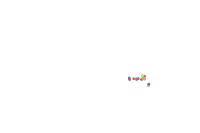

In [15]:
interval_data_search = gis.content.search('owner:' + USERNAME + ' AND title:interval_1hour_All')
interval_data_item = interval_data_search[0]
interval_data_item

In [16]:
interval_data_f_layer = interval_data_item.layers[0]
interval_data_f_layer

<FeatureCollection>

In [22]:
# interval_data_layer_collection = FeatureLayerCollection.fromitem(interval_data_item)
# interval_data_layer_collection

In [17]:
interval_data_f_set = interval_data_f_layer.query() #querying without any conditions returns all the features
interval_data_f_set.sdf.head()

,Station,Serial_number,Latitude,Longitude,Floor,Height,Location_description,Building_name,Timestamp,Wind_Speed,Temperature_PT100,Relative_Humidity,Solar_Radiation,PM1_0,PM2_5,PM10,__OBJECTID,OBJECTID,SHAPE
0,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/10 15:00:00,0.723333,28.236667,69.006667,137.066667,2.490000,3.566667,5.976667,0,1,"{""x"": 11559298.42, ""y"": 142182.84, ""spatialRef..."
1,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/10 16:00:00,0.626667,28.586667,67.600000,115.866667,3.900000,5.900000,9.820000,1,2,"{""x"": 11559298.42, ""y"": 142182.84, ""spatialRef..."
2,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/10 17:00:00,0.550000,28.153333,69.416667,8.800000,8.503333,13.073333,19.570000,2,3,"{""x"": 11559298.42, ""y"": 142182.84, ""spatialRef..."
3,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/10 18:00:00,0.556667,27.746667,71.790000,0.600000,5.510000,7.903333,13.123333,3,4,"{""x"": 11559298.42, ""y"": 142182.84, ""spatialRef..."
4,#1,21004880,1.277144,103.838944,Ground,2.5m,"lamppost 7/4, between BLK 3 and Blk 7 in Evert...",Everton park,2022/10/10 19:00:00,0.610000,27.706667,72.386667,0.633333,4.953333,6.950000,9.836667,4,5,"{""x"": 11559298.42, ""y"": 142182.84, ""spatialRef..."


In [20]:
features_to_be_removed = interval_data_f_set.sdf.to_dict('records')
features_to_be_removed.__len__()


3192

In [18]:
features_to_be_added = csv_data.to_dict('records')
features_to_be_added.__len__()


3211

In [ ]:
interval_data_f_layer.edit_features(adds = features_to_be_added)